In [ ]:
#############################################################################################################################################################
#############################################################################################################################################################
############################ PROGRAM TO PERFORM STATISTICAL TESTS FOR EVALUATION OF AN EXPERIMENT - WITH BINARY METRIC OUTCOME ##############################
#############################################################################################################################################################
#############################################################################################################################################################

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/ab_data.csv")
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [4]:
####### Data Cleaning - Include only records with group and landing page as treatment-newpage and control-oldpage; and remove duplicate users #######
df2 = df[(df["group"]=="treatment")&(df["landing_page"]=="new_page")
                |(df["group"]=="control")&(df["landing_page"]=="old_page")]
df2.drop_duplicates(subset="user_id",inplace=True) 
df2

C:\Users\madan\AppData\Local\Temp\ipykernel_39496\973388645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset="user_id",inplace=True)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [5]:
#################################################### Calculate Conversion Rates #####################################################################################
df2_convrates = pd.DataFrame({'UserCnt':df2.groupby(['group','landing_page'], observed=True, dropna=False)['converted'].count(),
                              'ConvertedCnt':df2.groupby(['group','landing_page'], observed=True, dropna=False)['converted'].sum()}).reset_index()
df2_convrates['NotConvertedCnt'] = df2_convrates['UserCnt']-df2_convrates['ConvertedCnt']
df2_convrates['ConversionRate'] = df2_convrates['ConvertedCnt']/df2_convrates['UserCnt']
df2_convrates

,group,landing_page,UserCnt,ConvertedCnt,NotConvertedCnt,ConversionRate
0,control,old_page,145274,17489,127785,0.120386
1,treatment,new_page,145310,17264,128046,0.118808


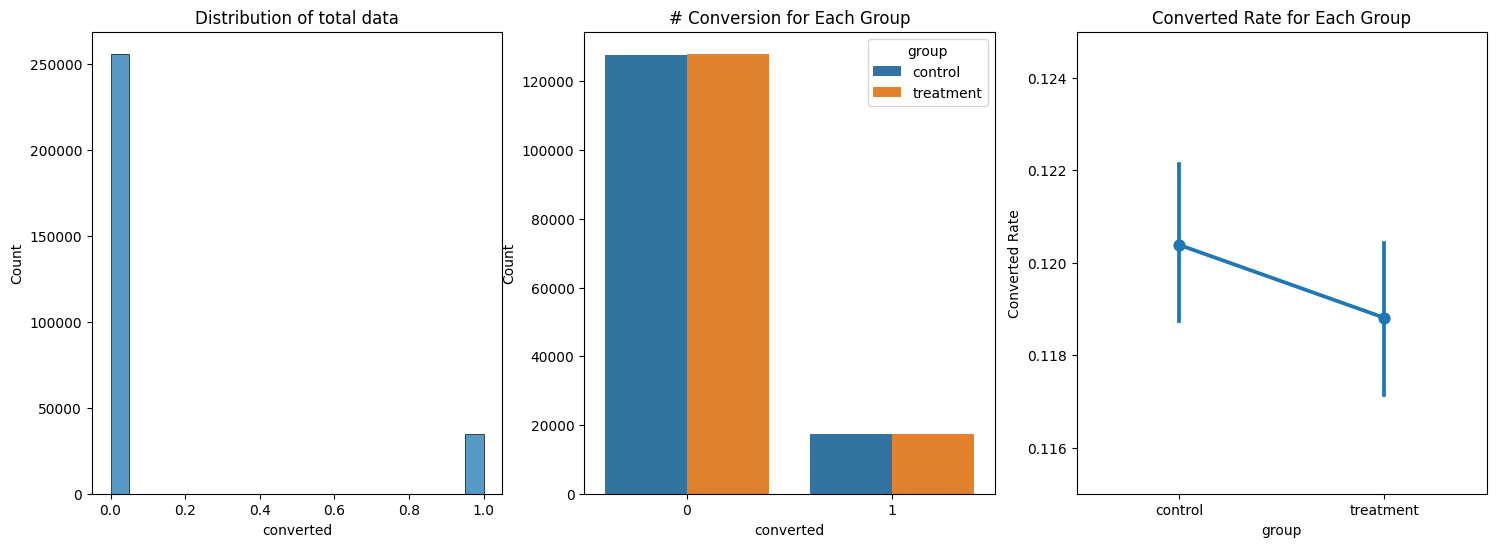

In [6]:
############################################ Plot the Convenrsions by Treatment and Control Group #################################################################
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3)

sns.histplot(x="converted", data=df2, ax=axes[0])
axes[0].set_title("Distribution of total data")

sns.countplot(x="converted", data=df2, hue="group", ax=axes[1])
axes[1].set(title="# Conversion for Each Group", ylabel="Count")

sns.pointplot(x="group", y="converted", data=df2, ax=axes[2])
axes[2].set_ylim([0.115, 0.125])
axes[2].set(title="Converted Rate for Each Group",ylabel="Converted Rate")

# Set the figure width and height
fig.set_figwidth(18)
fig.set_figheight(6)
plt.show()

In [7]:
################################ Create a Treatment vs Outcome 2x2 contingency table to perform tests ################################################################
df2_counts = pd.DataFrame({"Control_COUNT": df2[df2.group=="control"].converted.value_counts(),
                            "Treatment_COUNT": df2[df2.group=="treatment"].converted.value_counts()}).reset_index()
df2_counts

,converted,Control_COUNT,Treatment_COUNT
0,0,127785,128046
1,1,17489,17264


In [8]:
table = df2_counts.iloc[:,1:3].to_numpy()
table

array([[127785, 128046],
       [ 17489,  17264]], dtype=int64)

In [9]:
########################### Perform chi-squared test to validate if Treatment and Control groups are statistically different #######################################
import scipy.stats as stats

stat, p, dof, expected = stats.chi2_contingency(table)
print("fredoom of degree=%d"% dof)
print(expected)

### Chi-square Test of Independence ###
print("H0: No Association between Conversion rates Treatment vs Control Group")
print("H1: There is impact of Treatment vs Control Group on Conversion rates")

# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1-prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

fredoom of degree=1
[[127899.65274757 127931.34725243]
 [ 17374.34725243  17378.65274757]]
H0: No Association between Conversion rates Treatment vs Control Group
H1: There is impact of Treatment vs Control Group on Conversion rates
probability=0.950, critical=3.841, stat=1.704
Independent (fail to reject H0)
significance=0.050, p=0.192
Independent (fail to reject H0)


In [10]:
########################### Perform Fisher's Exact test to validate if Treatment and Control groups are statistically different ######################################
##### This Test is needed only when sample size is small (<1000) #######

### Fisher's Exact Test of Independence ###
print("H0: No Association between Conversion rates Treatment vs Control Group") ## The two categorical variables are independent; there is no association between them.
print("H1: There is impact of Treatment vs Control Group on Conversion rates") ## The two categorical variables are not independent; there is an association between them. 

odd_ratio, p_value = stats.fisher_exact(table, alternative="two-sided")
print("odd ratio is : " + str(odd_ratio))
print("p_value is : " + str(p_value))
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

H0: No Association between Conversion rates Treatment vs Control Group
H1: There is impact of Treatment vs Control Group on Conversion rates
odd ratio is : 0.9851226640350362
p_value is : 0.19047706765708894
Independent (fail to reject H0)
